In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/Cars vs Tanks'
!ls '/content/drive/MyDrive/Cars vs Tanks'

Testing  Training  Validation


In [ ]:
test_dir = os.path.join(base_dir, 'Testing')
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Validation')

In [ ]:
cars_dir = os.path.join(train_dir, 'cars/')
tanks_dir = os.path.join(train_dir, 'tanks/')

print("Jumlah Data Train Tiap Kelas")
print("Jumlah gambar cars :", len(os.listdir(cars_dir)))
print("Jumlah gambar tanks :", len(os.listdir(tanks_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar cars : 100
Jumlah gambar tanks : 100


In [ ]:
train_cars = os.path.join(train_dir, 'cars/')
train_tanks = os.path.join(train_dir, 'tanks/')

validation_cars = os.path.join(validation_dir, 'cars/')
validation_tanks = os.path.join(validation_dir, 'tanks/')

In [ ]:
import random
from shutil import copyfile
import os

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = os.path.join(source, i)
    destination = os.path.join(train, i)
    if not os.path.exists(destination):
      copyfile(i_file, destination)

  for i in val_files:
    i_file = os.path.join(source, i)
    destination = os.path.join(val, i)
    if not os.path.exists(destination):
      copyfile(i_file, destination)


train_ratio = 0.9


source_00 = cars_dir
train_00 = train_cars
val_00 = validation_cars
train_val_split(source_00, train_00, val_00, train_ratio)


source_01 = tanks_dir
train_01 = train_tanks
val_01 = validation_tanks
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
print("Jumlah all cars :", len(os.listdir(cars_dir)))
print("Jumlah all Train cars :", len(os.listdir(train_cars)))
print("Jumlah all Validation cars :", len(os.listdir(validation_cars)))

Jumlah all cars : 100
Jumlah all Train cars : 100
Jumlah all Validation cars : 100


In [ ]:
 import tensorflow as tf
 from tensorflow.keras.optimizers import Adam
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_datagenerator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print(' \nAkurasi mencapai 99%')
      self.model.stop_training= True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras
model.compile(loss = 'binary_crossentropy',
              optimizer = "Adam",
              metrics = ['accuracy'])

In [ ]:
from IPython.core import history
history = model.fit(
    train_datagenerator,
    steps_per_epoch = 2,
    epochs = 25,
    validation_data = val_datagenerator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 30s/step - accuracy: 0.5000 - loss: 0.7281 - val_accuracy: 0.4688 - val_loss: 0.7145
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 9s/step - accuracy: 0.5208 - loss: 0.7295 - val_accuracy: 0.5000 - val_loss: 0.6889
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 8s/step - accuracy: 0.5542 - loss: 0.6804 - val_accuracy: 0.6250 - val_loss: 0.6813
Epoch 4/25
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.5312 - loss: 0.7036

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.5312 - loss: 0.7036 - val_accuracy: 0.5938 - val_loss: 0.6796
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 8s/step - accuracy: 0.6979 - loss: 0.6619 - val_accuracy: 0.7500 - val_loss: 0.6684
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.5250 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4375 - loss: 0.7217 - val_accuracy: 0.5000 - val_loss: 0.6717
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 4s/step - accuracy: 0.5000 - loss: 0.6791 - val_accuracy: 0.5000 - val_loss: 0.6735
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 19s/step - accuracy: 0.5208 - loss: 0.6818 - val_accuracy: 0.8125 - val_loss: 0.6535
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.6042 - loss: 0.6556 - val_accuracy: 0.7812 - val_loss: 0.6447
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.7771 - loss: 0.6144 - val_accuracy: 0.6875 - val_loss: 0.5994
Epoch 12/25
2/2 ━━━━━━━

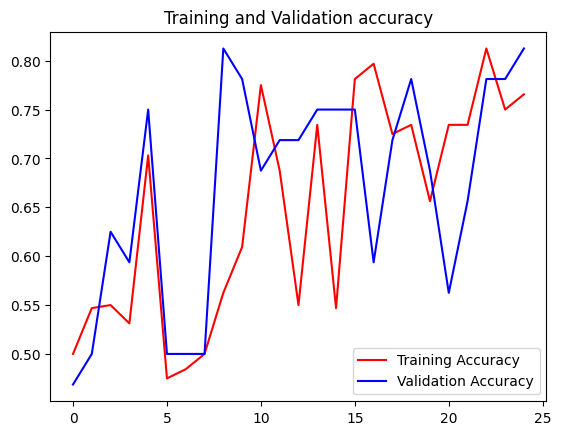

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

Saving mobiljpeg.jpeg to mobiljpeg.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
mobiljpeg.jpeg
This image belongs to class: cars


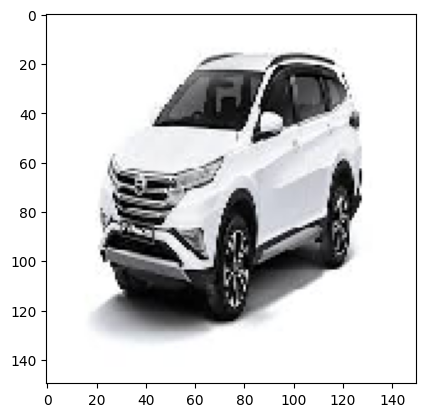

In [ ]:
import numpy as np
import keras
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array


uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=100)

    class_indices = train_datagenerator.class_indices
    class_list = {v: k for k, v in class_indices.items()}

    predicted_class = np.argmax(classes)

    print(fn)
    print(f"This image belongs to class: {class_list[predicted_class]}")